<a href="https://colab.research.google.com/github/bluesky1225/everything/blob/master/Face_Recognition_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얼굴 인식

copy from : https://github.com/santhalakshminarayana/face-recognition/blob/master/Face_Recognition.ipynb

아티클 : https://medium.com/analytics-vidhya/face-recognition-with-vgg-face-in-keras-96e6bc1951d5


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/Face_Recognition

/content/drive/My Drive/Colab Notebooks/Face_Recognition


In [0]:
path='/content/drive/My Drive/Colab Notebooks/Face_Recognition'

In [0]:
import os
import glob

In [0]:
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/Images/[a-z]*/[1-9]*.jpg'):
  image_path_names.append(file_name)
  #person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])
  person_names.add(image_path_names[-1].split('Images/')[-1].split('/')[0])

In [8]:
len(image_path_names)

47

In [9]:
person_names

{'bill', 'faker', 'iu', 'jobs'}

  There are total 60 images containing 10 images per person.

In [10]:
# Download Dlib CNN face detector
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2020-04-02 05:36:24--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.16MB/s    in 0.6s    

2020-04-02 05:36:25 (1.16 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [11]:
!bzip2 -dk mmod_human_face_detector.dat.bz2

bzip2: Output file mmod_human_face_detector.dat already exists.


In [0]:
%rm mmod_human_face_detector.dat.bz2

In [0]:
import cv2
import matplotlib.pyplot as plt
import dlib

In [0]:
# Load CNN face detector into dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [0]:
os.mkdir(path+'/Images_crop/')

In [0]:
# For each person create a separate folder
for person in person_names:
  os.mkdir(path+'/Images_crop/'+person+'/')

In [37]:
# Detect face, crop detected face and save them in corresponding person folder
good_file_names = []

for file_name in image_path_names:
  img=cv2.imread(file_name)
  img = cv2.resize(img, None, fx=0.5, fy=0.5)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Images_crop/'+file_name.split('/')[-2]+'/'+file_name.split('/')[-1]
  print(file_name)
  print(img_path)

  try:
    cv2.imwrite(img_path,img_crop)
    good_file_names.append(file_name)
  except:
    print(file_name)

  image_path_names = good_file_names

/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/2.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_crop/jobs/2.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/5.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_crop/jobs/5.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/1.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_crop/jobs/1.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/3.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_crop/jobs/3.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/4.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_crop/jobs/4.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/6.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_crop/jobs/6.jpg
/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images/jobs/7

In [48]:
#!mkdir images_test
!pwd
!cp Images/iu/1.jpg images_test/iu_1.jpg
!cp Images/jobs/1.jpg images_test/jobs_1.jpg
!cp Images/faker/1.jpg images_test/faker_1.jpg

/content/drive/My Drive/Colab Notebooks/Face_Recognition


In [0]:
# Get Image names for testing
test_image_path_names=[]
for file_name in glob.glob(path+'/images_test/*_*.jpg'):
  test_image_path_names.append(file_name)

In [52]:
len(test_image_path_names)

3

For each person 3 images to test in Images_test folder.

In [0]:
os.mkdir(path+'/Test_Images_crop/')

In [0]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  os.mkdir(path+'/Test_Images_crop/'+person+'/')

In [0]:
# Detect face,crop face and save in corresponding folder

for file_name in test_image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

<pre>Here images are sorted to corresponding test and train folders of same person
Directory structure :
|Images /
|  |-- (60 images)
|Images_crop /
|  |--angelamerkel
|     |--(10 images)
|  |--jinping / 
|     |--(10 images)
|  |--lakshminarayana / 
|         |--(10 imgaes)
|  |--modi / (10 images)
|  |--putin / (10 images) 
|  |--trump / (10 images)
|Images_test / 
|  |-- .. / (18 images)
|Images_test_crop / 
|  |--angelamerkel / (3 images)
|  |--jinping / (3 images)
|  |--lakshminarayana / (3 imgaes)
|  |--modi / (3 images)
|  |--putin / (3 images) 
|Face_Recognition.ipynb
|mmod_human_face_detector.dat
</pre>

In [56]:
! pip install gdown

In [57]:
#Download pre-trained vgg-face-model-weights as .h5 file
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/drive/My Drive/Colab Notebooks/Face_Recognition/vgg_face_weights.h5
580MB [00:42, 13.5MB/s]


In [58]:
%ls

Images/                       test_data.npy      train_labels.npy
Images_crop/                  Test_Images_crop/  vgg_face_weights.h5
images_test/                  test_labels.npy
mmod_human_face_detector.dat  train_data.npy


In [73]:
! pip install tensorflow==2.0.0

ERROR! Session/line number was not unique in database. History logging moved to new session 63
     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 450kB 72.1MB/s 
     |████████████████████████████████| 3.8MB 27.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b560b3682dd7f55aac594edfdcc71f2e63a27df85d7d2af56eb3e408b0b214be
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 2.

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [75]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

ERROR! Session/line number was not unique in database. History logging moved to new session 67


In [0]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)    

In [0]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [0]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [80]:
person_rep

{0: 'bill', 1: 'iu', 2: 'faker', 3: 'jobs', 4: '.ipynb_checkpoints'}

In [81]:
x_train=np.array(x_train)
y_train=np.array(y_train)

print(x_train.shape)

(44, 2622)


In [0]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('Test_Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [0]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [0]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [0]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [86]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform')) # input_dim=x_train.shape[1] #
classifier_model.add(BatchNormalization()) 
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform')) # units=6
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

ERROR! Session/line number was not unique in database. History logging moved to new session 68


In [109]:
classifier_model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7fd6a9fa8840>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7fd6a9fa8840

In [0]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'/content/drive/My Drive/Colab Notebooks/Face_Recognition/face_classifier_model.h5')

In [111]:
# Load saved model
classifier_model=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Face_Recognition/face_classifier_model.h5')

In [0]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Test_Images/'

In [0]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [0]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [0]:
# Label names for class numbers
person_rep={0:'bill',1:'iu',2:'faker',3:'jobs'}

In [0]:
os.mkdir(path+'/Predictions')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7fd6a699b488>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7fd6a699b488>. No

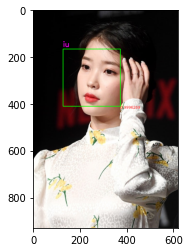

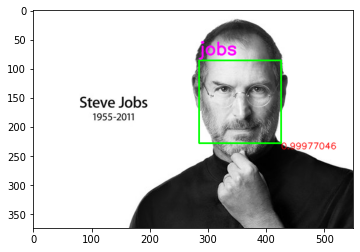

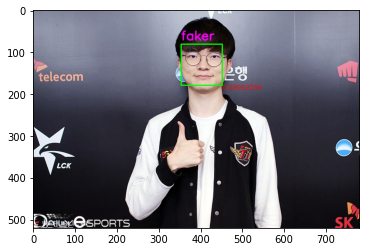

error: ignored

In [117]:
#dir_names = ['jobs', 'iu', 'faker']
#for dir_name in dir_names:
  #for img_name in os.listdir('Test_Images_crop/'+dir_name):
  for img_name in os.listdir('images_test/'):
    if img_name=='crop_img.jpg':
      continue
    # Load Image
      
    img=cv2.imread(path+'/images_test/'+img_name)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect Faces
    rects=dnnFaceDetector(gray,1)
    left,top,right,bottom=0,0,0,0
    for (i,rect) in enumerate(rects):
      # Extract Each Face
      left=rect.rect.left() #x1
      top=rect.rect.top() #y1
      right=rect.rect.right() #x2
      bottom=rect.rect.bottom() #y2
      width=right-left
      height=bottom-top
      img_crop=img[top:top+height,left:left+width]
      cv2.imwrite(path+'/images_test/crop_img.jpg',img_crop)
      
      # Get Embeddings
      crop_img=load_img(path+'/images_test/crop_img.jpg',target_size=(224,224))
      crop_img=img_to_array(crop_img)
      crop_img=np.expand_dims(crop_img,axis=0)
      crop_img=preprocess_input(crop_img)
      img_encode=vgg_face(crop_img)

      # Make Predictions
      embed=K.eval(img_encode)
      person=classifier_model.predict(embed)
      name=person_rep[np.argmax(person)]
      os.remove(path+'/images_test/crop_img.jpg')
      cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
      img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
      img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
    # Save images with bounding box,name and accuracy 
    cv2.imwrite(path+'/Predictions/'+img_name,img)
    plot(img)